In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure 
plt.style.use('ggplot')
%matplotlib inline
#matplotlib.rcPararms['figure.figsize']=(12,8)

In [3]:
movies=pd.read_csv('movies.csv')

In [16]:
movies.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83,2020
7616,High on the Hog,R,Action,2019,"April 16, 2019 (United States)",3.5,195,Tony Wash,Andy Golub,Sid Haig,United States,1200000,45696,Hicktown Entertainment,85,2019
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150,2020
7645,Birds of Prey,R,Action,2020,"February 7, 2020 (United States)",6.1,190000,Cathy Yan,Christina Hodson,Margot Robbie,United States,84500000,201858461,Clubhouse Pictures (II),109,2020
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124,2020
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020


In [13]:
movies.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
correctYear    0
dtype: int64

In [6]:
for col in movies.columns:
    pct_missing=np.mean(movies[col].isnull())
    print(pct_missing)

0.0
0.010041731872717789
0.0
0.0
0.0002608242044861763
0.0003912363067292645
0.0003912363067292645
0.0
0.0003912363067292645
0.00013041210224308815
0.0003912363067292645
0.2831246739697444
0.02464788732394366
0.002217005738132499
0.0005216484089723526


In [12]:
movies=movies.dropna()

In [15]:
movies.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
correctYear      int32
dtype: object

In [14]:
movies['budget']=movies['budget'].astype('int64')
movies['gross']=movies['gross'].astype('int64')
movies['votes']=movies['votes'].astype('int64')
movies['runtime']=movies['runtime'].astype('int64')

In [10]:
movies['correctYear']=movies['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [21]:
movies=movies.sort_values(by=['gross'],inplace=False,ascending=False)

In [20]:
movies.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


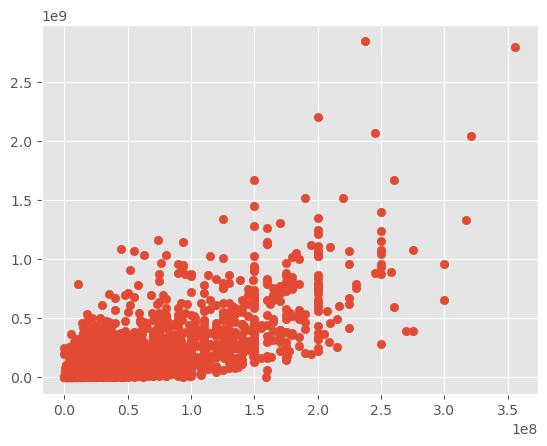

In [22]:
plt.scatter(x=movies['budget'],y=movies['gross'])

<Axes: xlabel='budget', ylabel='gross'>

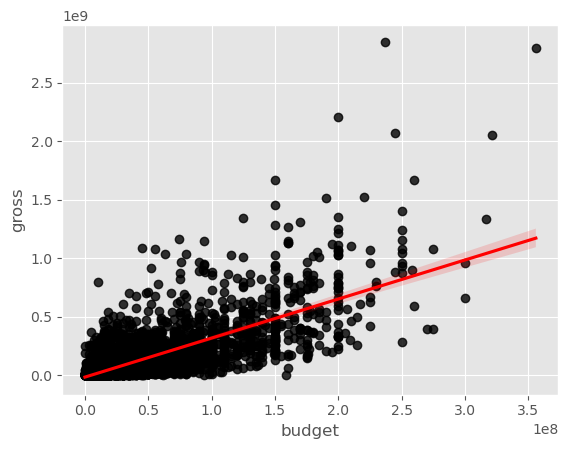

In [26]:
sns.regplot(x='budget',y='gross',data=movies,line_kws={"color":"red"},scatter_kws={'color':'black'})

C:\Users\Adeel Khan\AppData\Local\Temp\ipykernel_3048\3756633281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=movies.corr(method='pearson')


<Axes: >

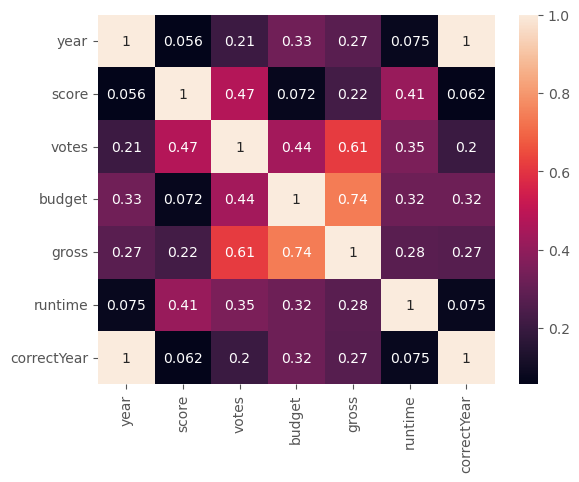

In [30]:
corelation=movies.corr(method='pearson')
sns.heatmap(corelation ,annot=True)


<Axes: >

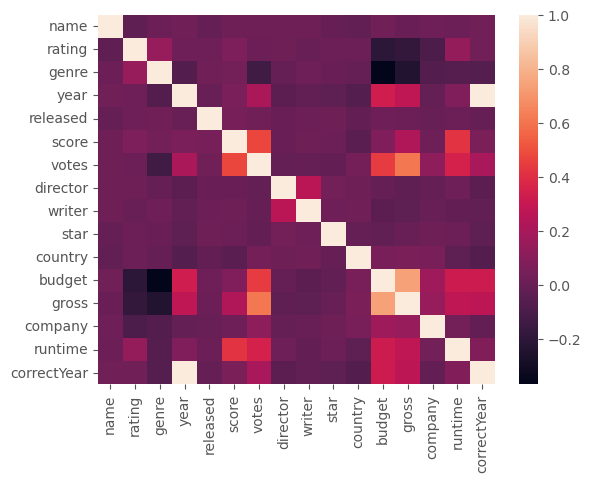

In [39]:
m_numerized=movies
for col in m_numerized.columns:
    if(m_numerized[col].dtype=='object'):
        m_numerized[col]=m_numerized[col].astype('category')
        m_numerized[col]=m_numerized[col].cat.codes
corelation=m_numerized.corr() 
sns.heatmap(corelation)

            


In [42]:
corelation_mat=m_numerized.corr()
corelation_mat

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [51]:
corr_pairs=corelation_mat.unstack().sort_values()
high_corr=corr_pairs[(corr_pairs)>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         correctYear    0.998726
correctYear  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctYear  correctYear    1.000000
dtype: float64